In [1]:
import os
import pandas as pd
import numpy as np
import sys
import xarray as xr
from glmtools.io.glm import GLMDataset
import time

from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
from tqdm import tqdm

In [3]:
data_folder = "./Data/"
sample_glm_file = data_folder + "GLM/2019/240/00/OR_GLM-L2-LCFA_G17_s20202400000000_e20202400000200_c20202400000225.nc"
glm_files = []
bbox = (-140, -30, 0, 60)

In [60]:
count = 0
for f in tqdm(sorted(os.listdir(data_folder + "GLM/240/00"))):
    full_path = "{}/{}".format(data_folder + "GLM/240/00", f)
    glm_files.append(full_path)
    count+=1
    if count >= 10:
        break

  5%|▌         | 9/180 [00:00<00:00, 60787.01it/s]


In [61]:
glm_files

['./Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400000000_e20202400000200_c20202400000225.nc',
 './Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400000200_e20202400000400_c20202400000428.nc',
 './Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400000400_e20202400001000_c20202400001014.nc',
 './Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400001000_e20202400001200_c20202400001222.nc',
 './Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400001200_e20202400001400_c20202400001427.nc',
 './Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400001400_e20202400002000_c20202400002025.nc',
 './Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400002000_e20202400002200_c20202400002215.nc',
 './Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400002200_e20202400002400_c20202400002431.nc',
 './Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400002400_e20202400003000_c20202400003027.nc',
 './Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400003000_e20202400003200_c20202400003227.nc']

In [6]:
glm_data = GLMDataset(sample_glm_file).dataset

In [7]:
glm_data

<xarray.Dataset>
Dimensions:                                 (number_of_events: 4270, number_of_field_of_view_bounds: 2, number_of_flashes: 181, number_of_groups: 2000, number_of_time_bounds: 2, number_of_wavelength_bounds: 2)
Coordinates: (12/21)
    event_id                                (number_of_events) uint32 1479858...
    event_time_offset                       (number_of_events) datetime64[ns] ...
    event_lat                               (number_of_events) float32 13.73 ...
    event_lon                               (number_of_events) float32 -90.59...
    event_parent_group_id                   (number_of_events) uint32 6780150...
    group_id                                (number_of_groups) uint32 6780150...
    ...                                      ...
    product_time                            datetime64[ns] 2020-08-27
    lightning_wavelength                    float32 ...
    group_time_threshold                    float32 ...
    flash_time_threshold                    float32 ...
    lat_field_of_view                       float32 ...
    lon_field_of_view                       float32 -137.0
Dimensions without coordinates: number_of_events, number_of_field_of_view_bounds, number_of_flashes, number_of_groups, number_of_time_bounds, number_of_wavelength_bounds
Data variables: (12/37)
    event_energy                            (number_of_events) float32 6.848e...
    group_frame_time_offset                 (number_of_groups) datetime64[ns] ...
    group_area                              (number_of_groups) float32 179.8 ...
    group_energy                            (number_of_groups) float32 2.068e...
    group_quality_flag                      (number_of_groups) float32 ...
    flash_frame_time_offset_of_first_event  (number_of_flashes) datetime64[ns] ...
    ...                                      ...
    event_x                                 (number_of_events) float32 0.1181...
    event_y                                 (number_of_events) float32 0.0397...
    group_x                                 (number_of_groups) float32 0.1181...
    group_y                                 (number_of_groups) float32 0.0396...
    flash_x                                 (number_of_flashes) float32 0.118...
    flash_y                                 (number_of_flashes) float32 0.039...
Attributes: (12/29)
    production_site:           WCDAS
    featureType:               point
    dataset_name:              OR_GLM-L2-LCFA_G17_s20202400000000_e2020240000...
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    institution:               DOC/NOAA/NESDIS> U.S. Department of Commerce, ...
    ...                        ...
    time_coverage_start:       2020-08-27T00:00:00.0Z
    time_coverage_end:         2020-08-27T00:00:20.0Z
    production_data_source:    Realtime
    production_environment:    OE
    LUT_Filenames:             GLM_CALINR_AllFilters(FM2W_CDRL79RevD_PR_09_00...
    id:                        5db37036-aa7b-406c-9248-94b01d5fa2e9

In [8]:
from glmtools.io.glm import GLMDataset

# relative path to the netcdf file
sample_glm_file = "./Data/GLM/240/00/OR_GLM-L2-LCFA_G17_s20202400000000_e20202400000200_c20202400000225.nc"

glm_data = GLMDataset(sample_glm_file).dataset

groups = glm_data[['group_energy','group_area']]
flashes = glm_data[['flash_energy', 'flash_area']]

# remove unused data (optional)
# groups = groups.drop(['group_parent_flash_id','lightning_wavelength','product_time','group_time_threshold','flash_time_threshold','lat_field_of_view','lon_field_of_view'])

# get the lattitude and longitude values
group_lon, group_lat = groups['group_lon'].values, groups['group_lat'].values
flash_lon, flash_lat = flashes['flash_lon'].values, flashes['flash_lat'].values

In [73]:
group_lon, group_lat = groups['group_lon'].values, groups['group_lat'].values
flash_lon, flash_lat = flashes['flash_lon'].values, flashes['flash_lat'].values

In [74]:
flash_lon, flash_lat

(array([ -90.641884,  -93.5996  , -101.02981 ,  -90.14958 ,  -84.74757 ,
        -105.25764 ,  -81.99329 ,  -81.69894 , -106.687935,  -95.95208 ,
         -92.5362  , -104.51512 , -105.157646, -100.968475, -112.38108 ,
         -96.77412 ,  -96.93994 , -114.38278 ,  -80.7967  , -100.47397 ,
         -91.81738 , -110.203285, -100.779915, -146.93228 , -116.74276 ,
         -82.15657 , -104.04443 ,  -99.41985 ,  -95.555824,  -90.42652 ,
         -93.51457 ,  -92.29638 , -100.84956 , -105.620056, -104.96702 ,
         -90.86125 ,  -89.59156 , -105.29957 ,  -93.55377 ,  -90.511955,
         -87.888626,  -92.26671 ,  -97.15363 ,  -93.57995 , -106.00253 ,
         -97.97819 ,  -96.95385 , -115.27462 , -101.67933 ,  -85.33384 ,
        -101.40203 ,  -91.15263 ,  -81.85596 , -100.989586,  -92.60813 ,
         -82.021675,  -78.87095 ,  -92.50075 , -115.80597 ,  -93.507866,
         -90.67333 ,  -80.23015 , -102.24823 , -103.85746 , -107.31466 ,
         -90.862495, -105.34417 , -115.74432 , -101

In [75]:
group_lat

array([13.674479, 13.665131, 13.661913, ..., 14.801663, 14.828126,
       14.840771], dtype=float32)

In [77]:
df = pd.read_csv(data_folder + "Laura/Hurricane_Laura_Trackfile_Spline.csv")

In [78]:
df

,Unnamed: 0,Date,Long,Lat
0,0,2020-08-16 18:00:00,-25.400000,10.900000
1,1,2020-08-16 18:10:00,-25.447964,10.894269
2,2,2020-08-16 18:20:00,-25.495929,10.888540
3,3,2020-08-16 18:30:00,-25.543893,10.882816
4,4,2020-08-16 18:40:00,-25.591858,10.877101
...,...,...,...,...
1580,1580,2020-08-27 17:20:00,-92.870797,32.660032
1581,1581,2020-08-27 17:30:00,-92.856693,32.708023
1582,1582,2020-08-27 17:40:00,-92.842552,32.756015
1583,1583,2020-08-27 17:50:00,-92.828383,32.804009


In [15]:
test = df[df["Date"] == "2020-08-20 00:00:00"]
test

,Unnamed: 0,Date,Long,Lat
468,468,2020-08-20 00:00:00,-46.980687,14.179562


In [16]:
test['Long'].values[0]

-46.98068713055332

In [24]:
import netCDF4 as nc
from  matplotlib.colors import LinearSegmentedColormap


In [80]:
def reduce_file(datafile):
    data = GLMDataset(datafile).dataset
    # time data in format "YYYY-MM-DD HH:MM:SS"
    time_str = data.time_coverage_start[:-3].replace('T', ' ')
    print(time_str)
    
    row = df[df["Date"] == time_str]
    if row.empty: # if time is not in trackfile
        return
    
    # extract data about groups
    groups = data[['group_energy','group_area']]
    groups = groups.drop(['group_parent_flash_id','lightning_wavelength','product_time','group_time_threshold','flash_time_threshold','lat_field_of_view','lon_field_of_view'])
    
    # center of the storm
    storm_center_lon, storm_center_lat = row['Long'].values, row['Lat'].values
    
    # group lat, lon
    groups_lon, groups_lat = groups['group_lon'].values, groups['group_lat'].values
    
    print(storm_center_lon, storm_center_lat)
    print()
    print(groups_lon)
    print(groups_lat)
    print()
    # convert lat, lon to storm center coordinates system
    lon = groups_lon - storm_center_lon
    lat = groups_lat - storm_center_lat
    print(lon)
    print(lat)
    
    # convert to from degree to km
    # https://stackoverflow.com/questions/1253499/simple-calculations-for-working-with-lat-lon-and-km-distance
    dis_from_center_y = lat * 110.574
    dis_from_center_x = lon * 111.320 * np.cos(np.radians(lat))
    
    print("distance from storm center (km)")
    print(dis_from_center_y)
    print(dis_from_center_x)
    
#     return dis_from_center_x
    
    group_loc = []
    a = np.random.random((41, 41))
    for i in range(41):
        for j in range(41):
            a[i][j] = 0
#     print(a)
            
    for x, y in zip(dis_from_center_x, dis_from_center_y):
        if abs(x) > 400 or abs(y) > 400:
            continue
        group_loc.append((x, y))
        j = int(x / 20 + 20)
        i = int(y / 20 + 20)
        print(i, j)
        a[i][j] += 1
        
    print(sum(a))
    # 41x41 pixel images
    
    cmap=LinearSegmentedColormap.from_list('br',["b", "w", "r"], N=256) 
    plt.imshow(a, cmap=cmap, interpolation='nearest')
    plt.show()
    

2020-08-27 00:00:00
[-92.74972383] [27.73813174]

[-90.60899  -90.612144 -90.61324  ... -87.82958  -87.82396  -87.81364 ]
[13.674479 13.665131 13.661913 ... 14.801663 14.828126 14.840771]

[2.1407303  2.13757936 2.13648073 ... 4.92014161 4.92576448 4.93608705]
[-14.06365321 -14.07300113 -14.07621882 ... -12.93646834 -12.91000579
 -12.89736102]
distance from storm center (km)
[-1555.07439019 -1556.10802661 -1556.46382026 ... -1430.43705061
 -1427.51098006 -1426.11279751]
[231.16319629 230.81351027 230.69163297 ... 533.80867792 534.4753672
 535.6225094 ]
23 20
23 20
23 20
23 20
23 20
23 20
23 20
23 20
23 21
23 21
23 21
23 20
23 20
23 20
23 20
24 21
24 21
24 21
12 22
12 22
12 22
12 22
12 22
12 22
12 22
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 12.  6.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]


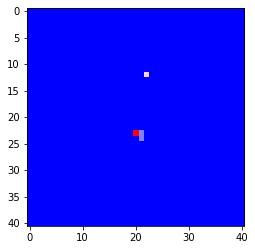

In [81]:
reduce_file(sample_glm_file)

In [46]:
def plot_groups(datafile, edges=(-180,180,-90,90),buffer=0):
    data = GLMDataset(datafile).dataset
    
    # time data in format "YYYY-MM-DD HH:MM:SS"
    time_str = data.time_coverage_start[:-3].replace('T', ' ')
    print(time_str)
    
    row = df[df["Date"] == time_str]
    if row.empty: # if time is not in trackfile
        return
    
    # extract data about groups
    groups = data[['group_energy','group_area']]
    groups = groups.drop(['group_parent_flash_id','lightning_wavelength','product_time','group_time_threshold','flash_time_threshold','lat_field_of_view','lon_field_of_view'])
    
    # center of the storm
    storm_center_lon, storm_center_lat = row['Long'].values, row['Lat'].values
        
    llcrnrlon = storm_center_lon - 20 # lower-left longitude
    llcrnrlat = storm_center_lat - 20 # lower-left lattitude
    urcrnrlon = storm_center_lon + 20 # upper-right longitude
    urcrnrlat = storm_center_lat + 20 # upper-right lattitude
    
    # draw the figure
    fig = plt.figure(dpi=200)
    m = Basemap(projection='merc', llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
                urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                lon_0=0,lat_0=0, resolution='l')

    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color = 'tan')
    m.drawmapboundary()
    
    # Plot groups as medium green dots
    group_x, group_y = m(groups['group_lon'].values, groups['group_lat'].values)
    m.plot(group_x, group_y, 'go', markersize=1)
    
    # Plot center of the storm
    storm_center_lon, storm_center_lat = m(row['Long'].values, row['Lat'].values)
    m.plot(storm_center_lon, storm_center_lat, 'ro', markersize=2)
    return
        
    # Put time 
    props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    plt.annotate(time_str, xy=(1, 1), xytext=(-76, -7.5),
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=7, bbox=props)

2020-08-27 00:00:00


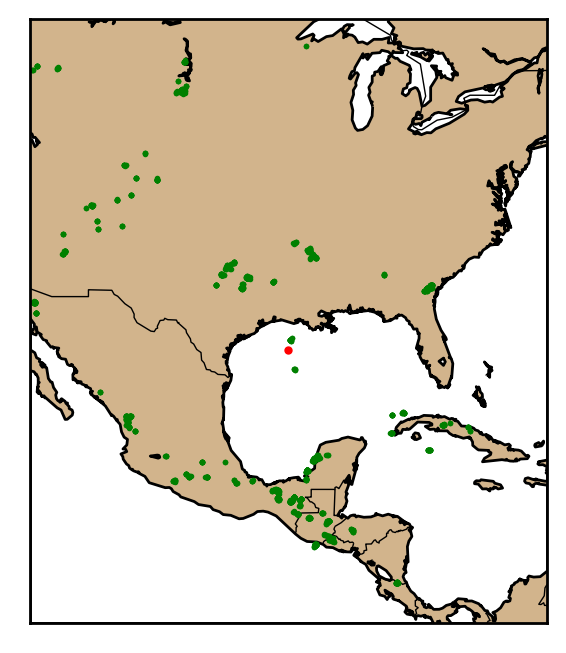

In [47]:
plot_groups(sample_glm_file, edges=bbox)
# +/-20 degree lat & lon
# 1500 km around storm center

In [101]:
def process_file(datafile, output_file, edges=(-180,180,-90,90),buffer=0):
    data = GLMDataset(datafile).dataset
    
    # time data in format "YYYY-MM-DD HH:MM:SS"
    time_str = data.time_coverage_start[:-3].replace('T', ' ')
    
    row = df[df["Date"] == time_str]
    if row.empty: # if time is not in trackfile
        return
    
    # extract data about groups
    groups = data[['group_energy','group_area']]
    groups = groups.drop(['group_parent_flash_id','lightning_wavelength','product_time','group_time_threshold','flash_time_threshold','lat_field_of_view','lon_field_of_view'])
    
    # center of the storm
    storm_center_lon, storm_center_lat = row['Long'].values, row['Lat'].values
    
    llcrnrlon = storm_center_lon - 20 # lower-left longitude
    llcrnrlat = storm_center_lat - 20 # lower-left lattitude
    urcrnrlon = storm_center_lon + 20 # upper-right longitude
    urcrnrlat = storm_center_lat + 20 # upper-right lattitude
    
    # draw the figure
    fig = plt.figure(dpi=200)
    m = Basemap(projection='merc', llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
                urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                lon_0=0,lat_0=0, resolution='l')

    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color = 'tan')
    m.drawmapboundary()
    
    # Plot groups as medium green dots
    group_x, group_y = m(groups['group_lon'], groups['group_lat'])
    m.plot(group_x, group_y, 'go', markersize=1)
    
    # Plot center of the storm
    storm_center_lon, storm_center_lat = m(row['Long'].values, row['Lat'].values)    
    m.plot(storm_center_lon, storm_center_lat, 'ro', markersize=2)
        
    # Put time 
    props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    plt.annotate(time_str, xy=(1, 1), xytext=(-76, -7.5),
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=7, bbox=props)
    
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()

In [14]:
process_file(sample_glm_file, "test.png", edges=bbox)

NameError: name 'process_file' is not defined

In [103]:
def process_hour(directory):
    i = 0;
    for f in tqdm(sorted(os.listdir(directory))):
        full_path = "{}/{}".format(directory, f)
#         print(full_path)
#         if i % 30 == 0:
        process_file(full_path, "Images/{}_{:03d}.png".format(os.path.basename(directory),i), edges=bbox)
        i += 1

In [104]:
process_hour(data_folder + "GLM/240/00")

100%|██████████| 180/180 [00:03<00:00, 45.42it/s]


In [105]:
from multiprocessing import Pool

def process_hour_parallel(directory):
    i = 0;
    args_list = []
    for f in sorted(os.listdir(directory)):
        full_path = "{}/{}".format(directory, f)
#         print(full_path)
#         process_file(full_path, "Images/{}_{:03d}.png".format(os.path.basename(directory),i), edges=bbox)
        if i % 30 == 0:
            args_list.append((full_path, "Images/{}_{:03d}.png".format(os.path.basename(directory),i), bbox))
        i += 1
    with Pool(processes = 8) as p:
        output = p.starmap_async(process_file, args_list).get()

In [106]:
t = time.time()
process_hour_parallel(data_folder + "GLM/240/00")
elapsed_time = time.time() - t

print(elapsed_time)

1.4188101291656494


In [116]:
def process_day(directory):
    for i in tqdm(range(24)):
        process_hour_parallel("{}/{:02d}".format(directory, i))

In [117]:
process_day(data_folder + "GLM/240")

100%|██████████| 24/24 [00:34<00:00,  1.46s/it]
